**Graduation Project**: PM Footprint calculator based on citizen behavior related to fine dust emissions.

Student: **Alessandro Monolo** | 1790210

GP supervisor: Angelique Ruiter

Master Data-Driven Design, Hogeschool Utrecht.

Academical Year: 2021/2022, Block C.

## 3 - Z - Score index calculation from % emission sources basing sub-dataframes:

In [1]:
# Import the Python Libraries I need to calculate Z score index and other functions:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from matplotlib import cm
%matplotlib inline

In [3]:
# Import the final dataframe with the name: df_survey_z_score

In [4]:
df_survey_z_score = pd.read_csv("df_survey_z_score.csv")

In [5]:
# Quick overview over the final dataframe:

In [6]:
#df_survey_z_score.head(10)
#print(df_survey_z_score.shape)
#print(df_survey_z_score.info())

In [7]:
# Check any missing values over the final dataframe:

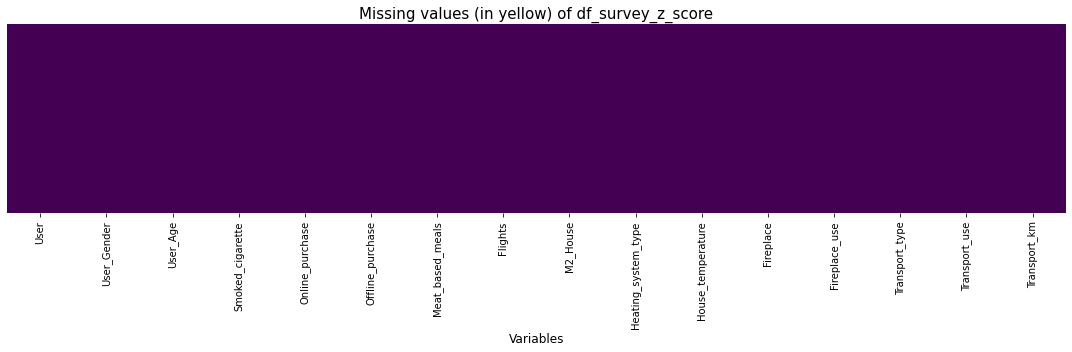

In [8]:
plt.figure(figsize=(15,5))
sns.heatmap(df_survey_z_score.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing values (in yellow) of df_survey_z_score', size=15)
plt.xlabel('Variables', size=12)
plt.tight_layout()
plt.show()

### Slice two dataframes;
#### First: Categorical variables
#### Second: Numerical variables

In [9]:
# Create new dataframe skipping first three categorical columns from df_survey_z_score,

In [10]:
df_variables_z_score = df_survey_z_score.drop(["User","User_Gender","User_Age"], axis=1)

In [11]:
# While here I save the first three dataframe columns with only categorical variables from the voters:

In [12]:
df_voters = df_survey_z_score[["User","User_Gender","User_Age"]].copy()

### Standardize the variables:
**Import StandardScaler from Scikit learn.**

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# Create a StandardScaler() object called scaler.

In [15]:
scaler = StandardScaler()

In [16]:
# Fit scaler to the features of the traffict sub-dataframe:

In [17]:
scaler.fit(df_variables_z_score)

StandardScaler()

In [18]:
# Use the .transform() method to transform the features to a scaled version for each sub-dataframes:

In [19]:
scaled_features = scaler.transform(df_variables_z_score)

In [20]:
# Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.

In [21]:
df_scaled_variables = pd.DataFrame(scaled_features, columns=df_variables_z_score.columns)

In [22]:
# Check among the scaled sub-dataframes:

In [23]:
#df_scaled_variables.head(10)

### Slicing the scaled dataframe in three sub-dataframe based on PM2.5 emissions % sources:
**Traffic, Heating & Others sources**

In [24]:
# Create new dataframes based on type of PM emissions, following the percentage distribution mentioned
# in this national research method among itlaian emission sources related to PM2.5:
# https://annuario.isprambiente.it/pon/basic/14

In [25]:
# First dataframe about traffic pollution emissions, which consitute around 17%:

In [26]:
df_scaled_traffic = df_scaled_variables[["Transport_type","Transport_use","Transport_km"]].copy()

In [27]:
# Second dataframe about heating pollution emissions, which consitute around 66,7%:

In [28]:
df_scaled_heating = df_scaled_variables[["M2_House","Heating_system_type","House_temperature", "Fireplace", "Fireplace_use"]].copy()

In [29]:
# Third dataframe about other pollution emissions, which constitute around 16,3%:

In [30]:
df_scaled_others = df_scaled_variables[["Smoked_cigarette","Online_purchase","Offline_purchase", "Meat_based_meals", "Flights"]].copy()

### Unproportional Z - Score calculation for each sub-dataset:
**Import Z - Score statistical function from Scipy.**

In [31]:
# Import from scypy library the function to calculate Z score:

In [32]:
import scipy.stats as stats

#### Z - Score Traffic sub-dataset:

In [33]:
# here I apply the sicpy function Z - score to each sliced dataframes:

In [34]:
df_z_score_traffic = df_scaled_traffic.apply(stats.zscore)

In [35]:
# Create a new dataframe column obtained from the sum of all the other df columns:

In [36]:
df_z_score_traffic['Row_traffic_index'] = df_z_score_traffic.sum(axis=1)

#### Z - Score Heating sub-dataset:

In [37]:
# here I apply the sicpy function Z - score to each sliced dataframes:

In [38]:
df_z_score_heating = df_scaled_heating.apply(stats.zscore)

In [39]:
# Create a new dataframe column obtained from the sum of all the other df columns:

In [40]:
df_z_score_heating['Row_heating_index'] = df_z_score_heating.sum(axis=1)

#### Z - Score Others sub-dataset:

In [41]:
# here I apply the sicpy function Z - score to each sliced dataframes:

In [42]:
df_z_score_others = df_scaled_others.apply(stats.zscore)

In [43]:
# Create a new dataframe column obtained from the sum of all the other df columns:

In [44]:
df_z_score_others['Row_others_index'] = df_z_score_others.sum(axis=1)

### Proportional Z - Score calculation for each sub-dataset:
**Calculate a final Z - Score based on % emission sources**

In [45]:
# Here I proportionate the row indexes just obtained with  the % of emissions related to the type of sources,
# Then I create a final index column and I check the sub-dataframe:

#### Z - Score Traffic - 17% of the total PM2.5 emissions:

In [46]:
df_z_score_traffic['Final_traffic_index'] = df_z_score_traffic['Row_traffic_index'] * 0.17

In [47]:
#df_z_score_traffic.head(5)

#### Z - Score Heating - 66,7% of the total PM2.5 emissions:

In [48]:
df_z_score_heating['Final_heating_index'] = df_z_score_heating['Row_heating_index'] * 0.667

In [49]:
#df_z_score_heating.head(5)

#### Z - Score Others - 16,3% of the total PM2.5 emissions:

In [50]:
df_z_score_others['Final_others_index'] = df_z_score_others['Row_others_index'] * 0.163

In [51]:
#df_z_score_others.head(5)

### Concat the sub-datasets with the voters dataset all together:

In [52]:
df_z_score_final = pd.concat([df_voters, df_z_score_traffic, df_z_score_heating, df_z_score_others], axis=1)

In [53]:
df_z_score_final['Overall_Index'] =  df_z_score_final[["Final_traffic_index", "Final_heating_index", "Final_others_index"]].sum(axis=1)

In [54]:
# Quick overview over the final Z-Score dataframe:

In [55]:
#df_z_score_final.head(10)

In [56]:
# Check the min and max value of the final propotional index:

In [57]:
df_min_value = df_z_score_final['Overall_Index'].min()
df_min_row = df_z_score_final.loc[df_z_score_final['Overall_Index'] == df_min_value]

In [58]:
df_max_value = df_z_score_final['Overall_Index'].max()
df_max_row = df_z_score_final.loc[df_z_score_final['Overall_Index'] == df_max_value]

In [59]:
df_min_row

,User,User_Gender,User_Age,Transport_type,Transport_use,Transport_km,Row_traffic_index,Final_traffic_index,M2_House,Heating_system_type,...,Row_heating_index,Final_heating_index,Smoked_cigarette,Online_purchase,Offline_purchase,Meat_based_meals,Flights,Row_others_index,Final_others_index,Overall_Index
70,71,Woman,18 - 24,-1.777234,-1.499178,-0.97756,-4.253973,-0.723175,-0.809829,-0.056908,...,-3.125622,-2.08479,-0.467167,-0.348418,-0.594244,-0.863431,-0.253803,-2.527063,-0.411911,-3.219877


In [60]:
df_max_row

,User,User_Gender,User_Age,Transport_type,Transport_use,Transport_km,Row_traffic_index,Final_traffic_index,M2_House,Heating_system_type,...,Row_heating_index,Final_heating_index,Smoked_cigarette,Online_purchase,Offline_purchase,Meat_based_meals,Flights,Row_others_index,Final_others_index,Overall_Index
11,12,Man,18 - 24,0.568572,1.31343,0.170657,2.052659,0.348952,2.83798,-0.056908,...,9.362046,6.244484,-0.467167,1.28417,1.374564,2.003019,-0.253803,3.940783,0.642348,7.235784


### Save final index dataframe dropping other numerical variables, maintaining categorical variables:

In [266]:
df_z_score_final_export = df_z_score_final[["User","User_Gender","User_Age", "Final_traffic_index", "Final_heating_index", "Final_others_index","Overall_Index"]].copy()

In [267]:
# Finally I round the numerical columns with only two decimals:

In [268]:
df_z_score_final_export = df_z_score_final_export.round(2)

In [269]:
# Save final csv file with the name of df_index:

In [270]:
df_z_score_final_export.to_csv('df_index.csv', index=False)

In [271]:
# Import last final dataframe and quick overview:

In [272]:
df_index = pd.read_csv("df_index.csv")

In [1]:
#print(df_index.head(10))
#print(df_index.shape)
#print(df_index.info())